In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# from Sam
def get_sig_iqr(zs,zp):
    ez = (zp-zs)/(1.+zs)
    pct25,pct75 = np.percentile(ez,[25.,75.])
    iqr = pct75-pct25
    sigma_iqr = iqr/1.349
    bias = np.median(ez)
    mask = (np.abs(ez)>0.15)
    f_cat_outlier = float(np.sum(mask)/len(ez))
    return sigma_iqr, f_cat_outlier

fname = '/Users/erfan/Downloads/buzzard_v2.0.0_lsst_validation_all.pickle'
df = pd.read_pickle(fname)

# apply source cut
df = df.query('(i>22) & (i<24) & (bad_shape==0)')

print(f'{len(df)} galaxies remained for the analysis')

zs = df['zs'] # spec-z
zp = df['zp'] # photo-z

199801 galaxies remained for the analysis


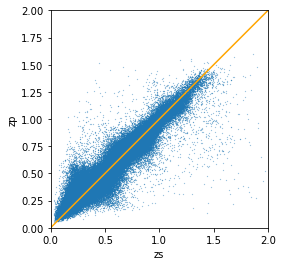

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(zs,zp,s=0.03)
ax.plot([0,1],[0,1], c='orange', transform=ax.transAxes)
ax.set_aspect('equal')
ax.set_xlim(0,2)
ax.set_ylim(0,2)
ax.set_xlabel('zs')
ax.set_ylabel('zp');

In [3]:
zp.mean(), zs.mean()

(0.5843547582626343, 0.5800656676292419)

Text(0, 0.5, '$count$')

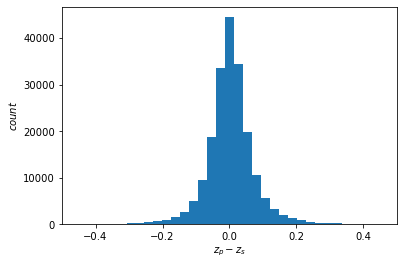

In [4]:
plt.hist(zp-zs,bins=100)
plt.xlim(-0.5,0.5)
plt.xlabel(r'$z_p-z_s$')
plt.ylabel(r'$count$')

# Tomography

In [5]:
# redshift bin edgrs for sources
zcuts = [0.3,0.5,0.7,0.9,1.2]

# loop over tomographic bins
for i in range(len(zcuts)-1):
    idx = (zp>zcuts[i])&(zp<zcuts[i+1])
    zptomo, zstomo = zp[idx], zs[idx]
    sig_iqr, f_cat_outlier = get_sig_iqr(zstomo,zptomo)
    sigma_meandiff = np.std(zptomo-zstomo)/np.sqrt(len(zptomo))
    sig_zp, sig_zs = np.std(zptomo), np.std(zstomo)
    r = np.corrcoef(zptomo, zstomo)[0, 1]
    n = len(zptomo)
    sigma_diffmean = np.sqrt( (sig_zp**2)/n + (sig_zs**2)/n - 2*r*sig_zp*sig_zs/n )
    print(f'bin {i}: zp_mean = {zptomo.mean():.3f}, zs_mean = {zstomo.mean():.3f}, \
Dzmean = {zptomo.mean()-zstomo.mean():.3f}, sig_meandiff = {sigma_meandiff:.4f}, \
r = {r:.2f}, sig_diffmean = {sigma_diffmean:.4f}, \
sig_iqr = {sig_iqr:.3f}, cat_outlier = {100*f_cat_outlier:.2f}%')

bin 0: zp_mean = 0.402, zs_mean = 0.395, Dzmean = 0.006, sig_meandiff = 0.0003, r = 0.52, sig_diffmean = 0.0003, sig_iqr = 0.042, cat_outlier = 3.13%
bin 1: zp_mean = 0.597, zs_mean = 0.591, Dzmean = 0.006, sig_meandiff = 0.0004, r = 0.61, sig_diffmean = 0.0004, sig_iqr = 0.029, cat_outlier = 2.54%
bin 2: zp_mean = 0.789, zs_mean = 0.784, Dzmean = 0.005, sig_meandiff = 0.0004, r = 0.59, sig_diffmean = 0.0004, sig_iqr = 0.028, cat_outlier = 1.07%
bin 3: zp_mean = 1.011, zs_mean = 1.008, Dzmean = 0.003, sig_meandiff = 0.0005, r = 0.71, sig_diffmean = 0.0005, sig_iqr = 0.023, cat_outlier = 1.01%
